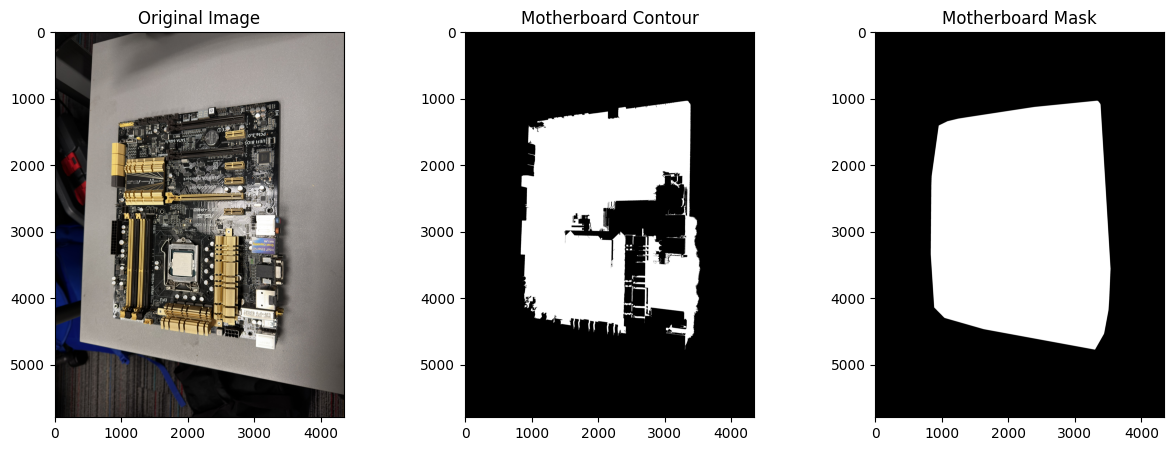

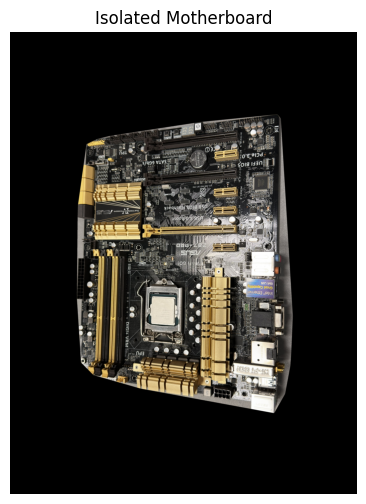

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### PART 1: Object Masking

# Load the image
#image_path = '/content/drive/MyDrive/School Documents/2024-2025/Fall 2024/850 - Machine Learning/NHanna_AER850_Project_3/motherboard_image.JPEG' # Image path in my school drive
image_path = '/content/drive/MyDrive/AER850_Project_3_Local_Copy/motherboard_image.JPEG' # Image path in my personal drive

image = cv2.imread(image_path)

# Convert the image to HSV (Hue, Saturation, Value) color space. Basically what color (0-180); how much color (0-255); and how bright (0-100)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for the color you want to detect (at the moment, it's black-to-medium bright)
lower_bound = (0, 0, 0)  # Hue, Sat, Brightness
upper_bound = (180, 255, 99) # Don't touch these. They work. No other values do lmao.

# Create a binary mask based on the above color range and find the contours
mask = cv2.inRange(hsv, lower_bound, upper_bound)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Create blank images with the same size and type as the original
mask1 = np.zeros_like(image)
mask2 = np.zeros_like(image)

# Draw the largest contour, then simplify, on the new images
cv2.drawContours(mask1, [largest_contour], -1, (255, 255, 255), thickness=-1)
hull = cv2.convexHull(largest_contour)
cv2.drawContours(mask2, [hull], -1, (255, 255, 255), thickness=-1)

# Display the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB)), plt.title('Motherboard Contour')
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB)), plt.title('Motherboard Mask')
plt.show()

# Use the mask to rip the motherboard from the original photo
motherboard = np.zeros_like(image)
mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)
cv2.bitwise_and(image, image, dst=motherboard, mask=mask2)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.imshow(cv2.cvtColor(motherboard, cv2.COLOR_BGR2RGB))
plt.title('Isolated Motherboard')
plt.axis('off')
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 33.4 MB/s eta 0:00:00


In [5]:
### PART 2: YOLOv8 Training

from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Load the pre-trained YOLOv8 Nano model

#checkpoint_dir = '/content/drive/MyDrive/School Documents/2024-2025/Fall 2024/850 - Machine Learning/NHanna_AER850_Project_3/checkpoints' # School Drive
checkpoint_dir = '/content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints' # Personal Drive

model.train(
    #data="/content/drive/MyDrive/School Documents/2024-2025/Fall 2024/850 - Machine Learning/NHanna_AER850_Project_3/data/data.yaml", # School Drive
    data="/content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/data.yaml", # Local Drive
    epochs=164,
    imgsz=1280,
    batch=4,
    patience=8,
    name='Component_Detector_Mk_I',
    project=checkpoint_dir, # Saving checkpoints, because I've already been burned once by Google Colabs
    save_period=32 # Extra checkpoints, more redundancy.
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 146MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/data.yaml, epochs=164, time=None, patience=8, batch=4, imgsz=1280, save=True, save_period=32, cache=False, device=None, workers=8, project=/content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints, name=Component_Detector_Mk_I, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

100%|██████████| 755k/755k [00:00<00:00, 40.2MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 151MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/train/labels... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [04:12<00:00,  2.15it/s]


train: New cache created: /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:49<00:00,  2.14it/s]

val: New cache created: /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I
Starting training for 164 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/164        11G      2.225      4.005      1.265       1719       1280: 100%|██████████| 136/136 [01:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.14it/s]

                   all        105      19108      0.606     0.0952     0.0655     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/164      8.18G      2.184      2.915      1.154       1313       1280: 100%|██████████| 136/136 [01:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]


                   all        105      19108      0.515      0.119     0.0914      0.052

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/164      8.85G      2.148      2.525      1.132       1547       1280: 100%|██████████| 136/136 [00:59<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.32it/s]

                   all        105      19108      0.611      0.134      0.158        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/164      13.9G      2.072      2.304      1.119       1078       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.24it/s]

                   all        105      19108      0.511      0.162      0.142     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/164      14.3G      1.987      2.151      1.107       2000       1280: 100%|██████████| 136/136 [01:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.45it/s]


                   all        105      19108      0.479      0.207      0.172      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/164      11.3G      1.952      2.054      1.077       1207       1280: 100%|██████████| 136/136 [01:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:14<00:00,  1.03s/it]

                   all        105      19108       0.45      0.284      0.171      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/164      15.6G      1.891      1.975      1.077       1438       1280: 100%|██████████| 136/136 [01:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:13<00:00,  1.05it/s]


                   all        105      19108      0.537      0.272      0.204      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/164      9.67G       1.93      1.932       1.07       1522       1280: 100%|██████████| 136/136 [01:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:13<00:00,  1.03it/s]


                   all        105      19108      0.545      0.303      0.251      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/164      15.2G      1.899      1.854      1.061        852       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]


                   all        105      19108      0.603      0.313      0.271      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/164      8.91G      1.919      1.826      1.064       1913       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        105      19108      0.602      0.312      0.267      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/164      15.1G      1.857      1.774      1.052       1118       1280: 100%|██████████| 136/136 [00:58<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.49it/s]


                   all        105      19108      0.601      0.329      0.291      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/164      13.6G      1.854      1.747      1.052       1209       1280: 100%|██████████| 136/136 [01:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.15it/s]

                   all        105      19108      0.679      0.328      0.347      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/164      9.96G       1.83      1.695      1.044       1454       1280: 100%|██████████| 136/136 [00:59<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        105      19108      0.698      0.328      0.339      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/164      10.2G      1.814      1.676       1.04        910       1280: 100%|██████████| 136/136 [00:59<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        105      19108      0.601      0.346      0.357      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/164      9.78G      1.802      1.639      1.043       1531       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:13<00:00,  1.07it/s]


                   all        105      19108      0.472       0.35      0.375      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/164      7.42G      1.815      1.652      1.042        967       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.29it/s]

                   all        105      19108      0.556      0.374      0.385      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/164      10.3G      1.782      1.608      1.032       1496       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.40it/s]

                   all        105      19108      0.471      0.416      0.392      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/164      10.1G      1.769      1.593      1.027       1129       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        105      19108      0.515      0.409      0.423      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/164      14.3G      1.768      1.546      1.025        722       1280: 100%|██████████| 136/136 [01:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.44it/s]

                   all        105      19108      0.475      0.419      0.427      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/164      7.36G      1.792       1.56      1.031       1231       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]


                   all        105      19108      0.541      0.407      0.435      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/164      11.2G      1.754      1.547      1.023       2033       1280: 100%|██████████| 136/136 [00:58<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.50it/s]

                   all        105      19108      0.544      0.438      0.446      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/164      14.8G      1.753      1.511      1.027       1005       1280: 100%|██████████| 136/136 [00:56<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        105      19108      0.493      0.457      0.458       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/164        10G      1.728      1.509      1.025       2043       1280: 100%|██████████| 136/136 [01:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        105      19108      0.483      0.465      0.468      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/164      10.4G      1.746      1.492      1.016        963       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.53it/s]

                   all        105      19108      0.457      0.484      0.472      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/164      13.5G      1.721      1.463      1.011        993       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        105      19108      0.537      0.467      0.478      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/164        15G      1.704      1.442       1.01       1053       1280: 100%|██████████| 136/136 [00:59<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]


                   all        105      19108      0.523      0.502      0.509      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/164      8.08G      1.721      1.455      1.009        903       1280: 100%|██████████| 136/136 [01:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.45it/s]

                   all        105      19108      0.559      0.484      0.503      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/164      14.8G      1.714      1.448      1.012        795       1280: 100%|██████████| 136/136 [01:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.49it/s]

                   all        105      19108      0.551      0.504      0.504      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/164      10.7G      1.712      1.425      1.004       1625       1280: 100%|██████████| 136/136 [01:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]


                   all        105      19108      0.581        0.5      0.522      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/164       8.4G      1.704      1.398      1.005        856       1280: 100%|██████████| 136/136 [01:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        105      19108      0.571      0.526      0.535      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/164      14.5G      1.682      1.388     0.9976       1968       1280: 100%|██████████| 136/136 [01:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.46it/s]

                   all        105      19108      0.624      0.524      0.549      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/164      8.97G      1.692      1.367      1.002       1444       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        105      19108      0.613       0.54      0.562      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/164        12G      1.701       1.38      1.003        813       1280: 100%|██████████| 136/136 [00:59<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        105      19108      0.611      0.567       0.57      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/164      9.48G      1.686      1.367     0.9943       1292       1280: 100%|██████████| 136/136 [01:02<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        105      19108      0.587      0.532      0.562      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/164      7.97G      1.683      1.345     0.9913       1174       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]

                   all        105      19108      0.632      0.521      0.551      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/164      10.2G      1.694       1.34     0.9962       1108       1280: 100%|██████████| 136/136 [00:58<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]

                   all        105      19108      0.603      0.539      0.568      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/164      13.4G       1.67      1.326     0.9921       1487       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        105      19108      0.632      0.562      0.579      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/164      15.5G      1.661      1.317     0.9934        615       1280: 100%|██████████| 136/136 [01:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]

                   all        105      19108      0.681      0.515      0.575      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/164      10.4G      1.663      1.313     0.9861       1123       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]


                   all        105      19108       0.62      0.574      0.593      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/164      13.6G      1.673        1.3     0.9943        736       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]

                   all        105      19108      0.678       0.56      0.596       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/164      8.89G      1.643      1.261     0.9933       1514       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        105      19108      0.645       0.57      0.603      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/164      12.3G      1.621      1.247     0.9871       1418       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]

                   all        105      19108      0.667      0.587       0.62      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/164      10.4G      1.631      1.262     0.9866        894       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]


                   all        105      19108      0.711      0.597      0.644      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/164      11.4G      1.646      1.253      0.986        761       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.51it/s]

                   all        105      19108      0.735      0.597      0.645      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/164      8.41G      1.614       1.24     0.9835       1270       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.92it/s]


                   all        105      19108      0.686      0.573      0.625      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/164      10.2G      1.599      1.222     0.9805       1315       1280: 100%|██████████| 136/136 [01:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        105      19108      0.722      0.571      0.642       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/164      11.8G      1.635      1.257     0.9773       1606       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]

                   all        105      19108       0.66      0.605      0.633       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/164      10.9G      1.618      1.231     0.9789       1813       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]

                   all        105      19108       0.66      0.597      0.647      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/164      10.3G      1.643      1.234     0.9818       1656       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]


                   all        105      19108      0.676      0.589      0.636      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/164      9.66G      1.603      1.215      0.987       1018       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]


                   all        105      19108      0.711      0.577      0.624       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/164      10.9G        1.6      1.206     0.9757        890       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]

                   all        105      19108      0.755      0.591      0.657      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/164      13.1G      1.576      1.182     0.9674        922       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]

                   all        105      19108      0.741        0.6      0.656      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/164      9.12G      1.587      1.182     0.9727       1611       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        105      19108      0.732      0.627      0.679      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/164      13.6G      1.583      1.163      0.977       1479       1280: 100%|██████████| 136/136 [01:00<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]


                   all        105      19108      0.715      0.632      0.669      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/164       9.6G      1.575      1.156     0.9637       1065       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        105      19108      0.738      0.626      0.676      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/164      13.2G       1.59      1.156     0.9705       1143       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]


                   all        105      19108      0.801      0.617      0.687       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/164      8.26G      1.582      1.174     0.9741        757       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]

                   all        105      19108        0.7      0.628      0.672      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/164      9.66G      1.581      1.154     0.9698       1498       1280: 100%|██████████| 136/136 [01:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]


                   all        105      19108      0.745       0.62      0.669      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/164      15.1G      1.569      1.144     0.9663       1957       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        105      19108      0.794      0.615      0.682      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/164      12.6G      1.555      1.125      0.967       1796       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]

                   all        105      19108      0.715      0.646      0.684      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/164      14.6G      1.567      1.125     0.9566       1122       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        105      19108      0.723      0.661      0.693        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/164      7.93G      1.545      1.111     0.9608       1625       1280: 100%|██████████| 136/136 [01:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        105      19108      0.748      0.639       0.69      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/164      9.35G      1.543      1.122     0.9651       1695       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]


                   all        105      19108       0.72       0.64      0.688      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/164      14.5G      1.581      1.125     0.9605       1553       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        105      19108      0.761      0.628        0.7      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/164       7.3G      1.565      1.123      0.963        869       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]


                   all        105      19108      0.766      0.639      0.689      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/164      10.9G      1.549      1.118     0.9619       1392       1280: 100%|██████████| 136/136 [01:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        105      19108      0.772      0.627      0.705      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/164      13.9G      1.552      1.104     0.9636       1635       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]


                   all        105      19108      0.792      0.638      0.704        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/164      13.2G      1.523      1.083     0.9622        890       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        105      19108      0.745      0.646      0.707      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/164      9.14G      1.535      1.091     0.9568       1458       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        105      19108       0.76      0.658      0.712      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/164      9.08G      1.549      1.102     0.9561        909       1280: 100%|██████████| 136/136 [01:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        105      19108      0.794      0.645      0.712      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/164      9.12G       1.54      1.082     0.9562       1157       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]

                   all        105      19108      0.804      0.622      0.705      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/164      8.95G      1.508      1.067     0.9614       1219       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]

                   all        105      19108      0.755       0.65      0.706      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/164      10.4G      1.548      1.085     0.9605        811       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]

                   all        105      19108      0.767      0.653      0.713      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/164      14.5G      1.546      1.074     0.9551        635       1280: 100%|██████████| 136/136 [01:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

                   all        105      19108      0.749      0.652      0.721      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/164       7.2G      1.534      1.066     0.9583        924       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]

                   all        105      19108      0.757      0.675      0.723      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/164      7.31G      1.511      1.045     0.9523        713       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        105      19108      0.769      0.668      0.726      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/164      10.1G      1.563      1.095     0.9594        934       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]

                   all        105      19108      0.794      0.677       0.74       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/164      8.88G      1.527      1.065     0.9497       1294       1280: 100%|██████████| 136/136 [01:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        105      19108      0.804      0.651      0.732      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/164      13.3G      1.531      1.065     0.9535        621       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]


                   all        105      19108      0.812      0.656      0.731      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/164        12G      1.475      1.018      0.949       1215       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.52it/s]

                   all        105      19108      0.773      0.675      0.739      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/164      9.41G      1.518      1.026     0.9521       1132       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        105      19108      0.777      0.694      0.742      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/164      11.5G        1.5      1.045     0.9532        795       1280: 100%|██████████| 136/136 [01:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]

                   all        105      19108      0.761      0.696      0.737      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/164      10.3G      1.529      1.041     0.9523       1269       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]


                   all        105      19108       0.81       0.66      0.732      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/164      7.88G      1.494       1.03      0.948       1980       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]

                   all        105      19108      0.787      0.688      0.739      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/164      13.9G      1.507      1.026      0.952       1588       1280: 100%|██████████| 136/136 [00:57<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]


                   all        105      19108      0.811      0.677      0.745      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/164      13.6G      1.464     0.9991     0.9435        892       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        105      19108      0.806      0.695      0.751      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/164      14.2G       1.52      1.019     0.9533       1853       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


                   all        105      19108      0.794      0.682      0.744      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/164      14.5G      1.506      1.024     0.9438        528       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.90it/s]

                   all        105      19108      0.783      0.695      0.749       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/164      10.3G      1.504      1.022     0.9485        866       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]


                   all        105      19108      0.792       0.69      0.747       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/164      7.52G      1.485      1.011     0.9375       1446       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]


                   all        105      19108       0.78      0.708      0.757      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/164       7.7G      1.494      1.002     0.9473       1358       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]


                   all        105      19108      0.775      0.703       0.75      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/164      12.5G       1.49      1.004     0.9441       1203       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


                   all        105      19108      0.797      0.694      0.745      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/164      10.5G      1.481     0.9923     0.9421       1774       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]


                   all        105      19108      0.814      0.689      0.755       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/164      12.5G      1.474     0.9967     0.9436       1184       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        105      19108      0.818      0.694      0.763      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/164      10.1G      1.503      1.008     0.9487       1433       1280: 100%|██████████| 136/136 [01:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]

                   all        105      19108      0.784      0.697      0.759      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/164      13.7G      1.466      0.992     0.9468       1755       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]

                   all        105      19108      0.834      0.675       0.75      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/164      13.4G      1.492      1.012     0.9412       1699       1280: 100%|██████████| 136/136 [00:58<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]

                   all        105      19108      0.843      0.684      0.756      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/164      10.4G      1.465     0.9751     0.9413       1069       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]

                   all        105      19108      0.832      0.691      0.763      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/164      13.1G      1.476     0.9887     0.9417       1896       1280: 100%|██████████| 136/136 [01:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]


                   all        105      19108      0.797      0.697      0.762      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/164      9.46G      1.456       0.97     0.9376        494       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        105      19108       0.81      0.698      0.755      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/164      12.5G      1.465     0.9733     0.9477        775       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        105      19108      0.804      0.722      0.774      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/164      7.42G       1.46     0.9683     0.9382        422       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

                   all        105      19108      0.825       0.69      0.767       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/164      10.8G      1.462     0.9611     0.9369       1507       1280: 100%|██████████| 136/136 [01:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]


                   all        105      19108      0.814      0.694      0.767      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/164      13.5G      1.447     0.9641     0.9414       1703       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]

                   all        105      19108      0.796      0.717       0.77      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/164      11.6G      1.465     0.9683     0.9341        870       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]


                   all        105      19108      0.817      0.714      0.767      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/164      9.25G      1.474     0.9721     0.9368       1880       1280: 100%|██████████| 136/136 [00:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        105      19108      0.809      0.705      0.766      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/164      13.8G       1.47      0.971     0.9368       1101       1280: 100%|██████████| 136/136 [01:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]


                   all        105      19108       0.82      0.701      0.774      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/164        10G      1.439     0.9579     0.9349        885       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]

                   all        105      19108      0.803      0.721      0.776      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/164      12.8G      1.441     0.9556     0.9323        806       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]


                   all        105      19108      0.796      0.722      0.777      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/164      11.4G      1.442     0.9441     0.9346        774       1280: 100%|██████████| 136/136 [00:58<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        105      19108       0.84      0.716      0.777      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/164      8.21G      1.454     0.9581     0.9387        940       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]

                   all        105      19108      0.816      0.716      0.771      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/164      14.8G      1.456     0.9589     0.9344       1088       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]

                   all        105      19108      0.823      0.709      0.772      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/164      11.5G      1.438      0.933     0.9331       1612       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        105      19108      0.822      0.714      0.778      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/164      6.91G      1.447     0.9427      0.941       1280       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]

                   all        105      19108      0.836      0.707      0.768      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/164      7.38G      1.441     0.9373     0.9322       1256       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        105      19108      0.824       0.72      0.773      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/164      11.2G      1.449     0.9517     0.9331       1255       1280: 100%|██████████| 136/136 [00:58<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        105      19108      0.823      0.718      0.778       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/164      11.7G      1.442     0.9344      0.931       1078       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        105      19108       0.83      0.718      0.779       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/164      14.7G       1.43     0.9395     0.9286        895       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]


                   all        105      19108      0.849      0.702      0.781      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/164      14.1G      1.454     0.9406     0.9359       1811       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]


                   all        105      19108      0.814      0.726      0.782      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/164      8.93G      1.441      0.926     0.9382       1056       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]


                   all        105      19108      0.815      0.725      0.778      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/164      7.96G      1.415     0.9222     0.9263       1808       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]

                   all        105      19108      0.812      0.726      0.784      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/164      15.5G      1.418     0.9181     0.9272        795       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]


                   all        105      19108      0.812      0.721      0.777      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/164      13.1G      1.422     0.9231     0.9318       1900       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        105      19108      0.857      0.699      0.782      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/164      12.9G      1.421     0.9144     0.9273       1304       1280: 100%|██████████| 136/136 [00:59<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]

                   all        105      19108      0.837      0.716      0.778       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/164        13G      1.436     0.9253     0.9286       1861       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]

                   all        105      19108      0.819      0.722      0.776      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/164      8.96G       1.43     0.9193     0.9292       1128       1280: 100%|██████████| 136/136 [00:56<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.90it/s]

                   all        105      19108       0.83      0.726      0.784      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/164      9.11G      1.421     0.9197     0.9246        866       1280: 100%|██████████| 136/136 [00:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]


                   all        105      19108      0.837      0.724      0.781      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/164      8.55G      1.432     0.9237     0.9292       1218       1280: 100%|██████████| 136/136 [01:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.80it/s]

                   all        105      19108      0.825      0.723      0.788      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/164      15.5G      1.408     0.9058     0.9222       1675       1280: 100%|██████████| 136/136 [00:57<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]


                   all        105      19108      0.828      0.728      0.781      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/164      8.53G      1.403     0.9047      0.923       1637       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]

                   all        105      19108       0.83      0.729      0.788      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/164      9.47G      1.442     0.9311     0.9326       1718       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        105      19108      0.823      0.728      0.787      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/164      11.4G      1.439     0.9364     0.9252       1463       1280: 100%|██████████| 136/136 [01:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]

                   all        105      19108      0.832      0.735       0.79      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/164      11.8G      1.426     0.9186     0.9251       1176       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]

                   all        105      19108      0.834      0.724      0.789      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/164      13.1G      1.392     0.8952     0.9251        792       1280: 100%|██████████| 136/136 [00:57<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]

                   all        105      19108      0.864      0.713       0.79      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/164      10.2G      1.415     0.9087     0.9234        499       1280: 100%|██████████| 136/136 [00:57<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]

                   all        105      19108      0.823      0.738      0.793       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/164      10.9G      1.419      0.897     0.9237       1157       1280: 100%|██████████| 136/136 [01:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.66it/s]

                   all        105      19108      0.825      0.738      0.793      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/164      10.1G      1.436     0.9185     0.9301       2430       1280: 100%|██████████| 136/136 [00:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]


                   all        105      19108      0.819      0.742      0.794      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/164      10.7G      1.433     0.9203     0.9273        887       1280: 100%|██████████| 136/136 [00:57<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]

                   all        105      19108      0.852      0.723      0.794      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/164      14.2G      1.399     0.8982     0.9198       1192       1280: 100%|██████████| 136/136 [00:57<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]


                   all        105      19108      0.832      0.732      0.793      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/164      9.45G      1.401     0.9005     0.9249       1019       1280: 100%|██████████| 136/136 [00:59<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        105      19108      0.849      0.725      0.794      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/164      13.9G      1.396     0.8973     0.9226       2049       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


                   all        105      19108      0.845      0.724      0.789      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/164      12.3G      1.396     0.8883     0.9229       1531       1280: 100%|██████████| 136/136 [00:56<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        105      19108      0.824      0.744      0.794      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/164        13G      1.393     0.8953     0.9265       1274       1280: 100%|██████████| 136/136 [00:57<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]

                   all        105      19108      0.823      0.744      0.794      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/164      14.9G      1.398     0.8967     0.9273        840       1280: 100%|██████████| 136/136 [01:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        105      19108      0.814      0.738      0.792      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/164      11.2G      1.398     0.8874     0.9283       1912       1280: 100%|██████████| 136/136 [00:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        105      19108      0.841      0.731      0.791      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/164      11.5G      1.419     0.9015     0.9271        690       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        105      19108      0.854      0.724      0.795      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/164      13.2G      1.395     0.8897     0.9197       1783       1280: 100%|██████████| 136/136 [00:59<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]


                   all        105      19108      0.842      0.733      0.796      0.588
EarlyStopping: Training stopped early as no improvement observed in last 8 epochs. Best results observed at epoch 139, best model saved as best.pt.
To update EarlyStopping(patience=8) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

147 epochs completed in 2.745 hours.
Optimizer stripped from /content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I/weights/last.pt, 6.4MB
Optimizer stripped from /content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I/weights/best.pt, 6.4MB

Validating /content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.30s/it]


                   all        105      19108      0.831      0.733      0.793      0.588
                Button         14         45      0.978      0.991      0.994      0.863
             Capacitor        104       7251      0.821      0.506      0.659      0.363
             Connector         76        659      0.821      0.906      0.921      0.716
                 Diode         11         53      0.688      0.453       0.52      0.412
Electrolytic Capacitor         15        160      0.949      0.956      0.968      0.749
                    IC         95       1322      0.862       0.93      0.949      0.735
              Inductor         12         45      0.935      0.733      0.822      0.656
                   Led         18        127      0.776      0.827      0.862       0.63
                  Pads         20        143      0.724      0.367      0.449      0.297
                  Pins         10        151      0.697      0.861      0.867      0.633
              Resisto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79a6da8b3d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [3]:
## STEP 3: YOLOv8 Evaluation
from ultralytics import YOLO

# Loading trained model & eval images
model = YOLO('/content/drive/MyDrive/AER850_Project_3_Local_Copy/checkpoints/Component_Detector_Mk_I/weights/best.pt')
eval_images_path = '/content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/evaluation'

# Evaluating model
results = model.predict(source=eval_images_path, save=True, save_txt=True, save_conf=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/3 /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/evaluation/ardmega.jpg: 1152x1280 14 Capacitors, 9 Connectors, 2 Diodes, 6 ICs, 4 Leds, 2 Padss, 18 Resistors, 1350.4ms
image 2/3 /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/evaluation/arduno.jpg: 864x1280 11 Capacitors, 8 Connectors, 1 Diode, 2 Electrolytic Capacitors, 5 ICs, 5 Leds, 1 Pads, 1 Pins, 12 Resistors, 847.0ms
image 3/3 /content/drive/MyDrive/AER850_Project_3_Local_Copy/Project 3 Data/data/evaluation/rasppi.jpg: 864x1280 22 Capacitors, 12 Connectors, 2 Diodes, 11 ICs, 5 Leds, 16 Resistors, 538.5ms
Speed: 27.3ms preprocess, 912.0ms inference, 14.4ms postprocess p

In [5]:
!cp -r runs/ /content/drive/MyDrive/AER850_Project_3_Local_Copy/Evaluation_Results/